# AutoML H2O-3

In [9]:
import h2o
from h2o.automl import *

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 mins 10 secs
H2O_cluster_timezone:,America/Mexico_City
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_faviovazquez_7g7uff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.95 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


In [5]:
dataset = h2o.import_file("data/churn_clean.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
dataset.describe()

Rows:7032
Cols:46




,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,PhoneService_Yes,PhoneService_No,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_No,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,TechSupport_No,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic)
type,int,int,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,1.0,18.25,18.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.16240045506257111,32.421786120591584,64.79820819112628,2283.300440841866,0.26578498293515357,0.4953071672354949,0.5046928327645052,0.4825085324232082,0.5174914675767919,0.7015073947667805,0.2984926052332196,0.9032992036405005,0.09670079635949944,0.09670079635949944,0.48137087599544937,0.42192832764505117,0.2161547212741752,0.4402730375426621,0.3435722411831627,0.49729806598407283,0.2161547212741752,0.286547212741752,0.2161547212741752,0.43899317406143346,0.34485210466439137,0.4399886234357224,0.3438566552901024,0.2161547212741752,0.2161547212741752,0.2901023890784983,0.4937428896473265,0.39945961319681456,0.3843856655290102,0.2161547212741752,0.39547781569965873,0.3883674630261661,0.2161547212741752,0.551052332195677,0.2396188850967008,0.20932878270762229,0.5927189988623436,0.4072810011376564,0.22810011376564276,0.21629692832764505,0.3363196814562002,0.21928327645051193
maxs,1.0,72.0,118.75,8684.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,0.3688439967571051,24.545259709263256,30.085973884049842,2266.771361883145,0.44178171135255484,0.5000135308251334,0.5000135308251334,0.4997294886907991,0.4997294886907991,0.45762927299583706,0.45762927299583706,0.2955709320291018,0.2955709320291018,0.2955709320291018,0.4996883660837623,0.49390232221945984,0.411650283101074,0.49645517361249863,0.4749341352656062,0.5000282545357301,0.411650283101074,0.4521802563790777,0.411650283101074,0.4962995009694702,0.4753538301712343,0.49642086911235717,0.4750277308912676,0.411650283101074,0.411650283101074,0.45384169447176065,0.49999639980846977,0.48982216135592527,0.48648430743334936,0.411650283101074,0.4889878485115233,0.48741354217682575,0.411650283101074,0.49742220045394525,0.4268812352987827,0.4068584317786346,0.49136292225652883,0.49136292225652883,0.41963733614522264,0.41174831685737523,0.472483332716697,0.4137903698282622
zeros,5890,0,0,0,5163,3549,3483,3639,3393,2099,4933,680,6352,6352,3647,4065,5512,3936,4616,3535,5512,5017,5512,3945,4607,3938,4614,5512,5512,4992,3560,4223,4329,5512,4251,4301,5512,3157,5347,5560,2864,4168,5428,5511,4667,5490
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.

In [7]:
train, test = dataset.split_frame([0.8], seed=42)

In [8]:
# Identify predictors and response
x = train.columns
y = "Churn"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [10]:
aml = H2OAutoML(max_runtime_secs = 90, #change this if you are in a rush hehehe
                max_models = 25,
                seed = 42,
                project_name='classification_1',
                sort_metric = "AUC")

%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 856 ms, sys: 152 ms, total: 1.01 s
Wall time: 1min 31s
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220829_75734_model_4


Model Summary: 


,,number_of_trees
0,,43.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12670880800839013
RMSE: 0.3559618069517994
LogLoss: 0.39355374983217734
Mean Per-Class Error: 0.21848966929796976
AUC: 0.8643254664996218
AUCPR: 0.6932077592794685
Gini: 0.7286509329992437

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34272804737091067: 


,,0,1,Error,Rate
0,0,3378.0,770.0,0.1856,(770.0/4148.0)
1,1,373.0,1111.0,0.2513,(373.0/1484.0)
2,Total,3751.0,1881.0,0.2029,(1143.0/5632.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.342728,0.660327,208.0
1,max f2,0.190936,0.764011,277.0
2,max f0point5,0.520151,0.657505,134.0
3,max accuracy,0.482335,0.817116,149.0
4,max precision,0.890499,1.000000,0.0
5,max recall,0.018504,1.000000,397.0
6,max specificity,0.890499,1.000000,0.0
7,max absolute_mcc,0.367327,0.526029,197.0
8,max min_per_class_accuracy,0.301970,0.782787,225.0
9,max mean_per_class_accuracy,0.219927,0.786526,263.0



Gains/Lift Table: Avg response rate: 26.35 %, avg score: 26.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010476,0.845585,3.473526,3.473526,0.915254,0.859754,0.915254,0.859754,0.036388,0.036388,247.352552,247.352552,0.035183
1,2,0.020241,0.816477,3.381132,3.428950,0.890909,0.830309,0.903509,0.845548,0.033019,0.069407,238.113208,242.894973,0.066755
2,3,0.031783,0.802127,3.328053,3.392311,0.876923,0.807455,0.893855,0.831715,0.038410,0.107817,232.805308,239.231128,0.103236
3,4,0.040128,0.784552,3.391409,3.392124,0.893617,0.792075,0.893805,0.823472,0.028302,0.136119,239.140907,239.212366,0.130333
4,5,0.050071,0.764839,3.117443,3.337577,0.821429,0.774111,0.879433,0.813670,0.030997,0.167116,211.744320,233.757718,0.158919
5,6,0.100142,0.673550,2.664679,3.001128,0.702128,0.717730,0.790780,0.765700,0.133423,0.300539,166.467856,200.112787,0.272092
6,7,0.150036,0.597898,2.377032,2.793588,0.626335,0.635284,0.736095,0.722331,0.118598,0.419137,137.703235,179.358841,0.365377
7,8,0.200107,0.525764,2.193650,2.643471,0.578014,0.562431,0.696539,0.682320,0.109838,0.528976,119.364952,164.347061,0.446526
8,9,0.300071,0.375784,1.712198,2.333230,0.451155,0.447270,0.614793,0.604017,0.171159,0.700135,71.219832,133.323020,0.543192
9,10,0.400036,0.263630,1.193146,2.048336,0.314387,0.320089,0.539725,0.533066,0.119272,0.819407,19.314607,104.833567,0.569407




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.13368830165053264
RMSE: 0.3656341089812774
LogLoss: 0.4123103264303941
Mean Per-Class Error: 0.24010662105856878
AUC: 0.8485622597322257
AUCPR: 0.6561863210573982
Gini: 0.6971245194644513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3750055432319641: 


,,0,1,Error,Rate
0,0,3467.0,681.0,0.1642,(681.0/4148.0)
1,1,469.0,1015.0,0.316,(469.0/1484.0)
2,Total,3936.0,1696.0,0.2042,(1150.0/5632.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375006,0.638365,193.0
1,max f2,0.119910,0.752227,313.0
2,max f0point5,0.483269,0.629529,150.0
3,max accuracy,0.483269,0.804510,150.0
4,max precision,0.879283,1.000000,0.0
5,max recall,0.017441,1.000000,397.0
6,max specificity,0.879283,1.000000,0.0
7,max absolute_mcc,0.375006,0.499138,193.0
8,max min_per_class_accuracy,0.291911,0.766173,229.0
9,max mean_per_class_accuracy,0.250558,0.771576,247.0



Gains/Lift Table: Avg response rate: 26.35 %, avg score: 26.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011009,0.842065,3.121815,3.121815,0.822581,0.858840,0.822581,0.858840,0.034367,0.034367,212.181549,212.181549,0.031715
1,2,0.020064,0.821705,3.348660,3.224197,0.882353,0.833004,0.849558,0.847180,0.030323,0.064690,234.866022,222.419674,0.060592
2,3,0.030007,0.799719,3.388525,3.278649,0.892857,0.811306,0.863905,0.835293,0.033693,0.098383,238.852522,227.864878,0.092838
3,4,0.040128,0.779996,2.863007,3.173819,0.754386,0.789547,0.836283,0.823755,0.028976,0.127358,186.300657,217.381867,0.118439
4,5,0.050071,0.760195,3.117443,3.162624,0.821429,0.769250,0.833333,0.812931,0.030997,0.158356,211.744320,216.262354,0.147025
5,6,0.100142,0.673821,2.530099,2.846361,0.666667,0.718234,0.750000,0.765582,0.126685,0.285040,153.009883,184.636119,0.251048
6,7,0.150036,0.596864,2.282491,2.658849,0.601423,0.633468,0.700592,0.721648,0.113881,0.398922,128.249130,165.884942,0.337929
7,8,0.200107,0.524066,2.153276,2.532344,0.567376,0.560643,0.667258,0.681361,0.107817,0.506739,115.327560,153.234382,0.416334
8,9,0.300071,0.374970,1.759385,2.274843,0.463588,0.448062,0.599408,0.603641,0.175876,0.682615,75.938489,127.484330,0.519403
9,10,0.400036,0.254629,1.172923,1.999486,0.309059,0.317425,0.526853,0.532119,0.117251,0.799865,17.292326,99.948556,0.542874




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.788705,0.026033,0.778172,0.813665,0.772647,0.818828,0.760213
1,auc,0.849655,0.009452,0.852501,0.859659,0.844391,0.855678,0.836046
2,err,0.211295,0.026033,0.221828,0.186335,0.227353,0.181172,0.239787
3,err_count,238.000000,29.291637,250.000000,210.000000,256.000000,204.000000,270.000000
4,f0point5,0.607946,0.045193,0.579004,0.667311,0.582350,0.645161,0.565903
5,f1,0.650102,0.020405,0.631268,0.663462,0.639437,0.679245,0.637097
6,f2,0.701681,0.026704,0.693904,0.659656,0.708932,0.717132,0.728782
7,lift_top_group,3.362858,0.405242,3.587095,3.577778,3.791246,2.912069,2.946101
8,logloss,0.412312,0.011563,0.403604,0.411766,0.416233,0.400331,0.429625
9,max_per_class_error,0.269335,0.042039,0.256944,0.342857,0.235690,0.255172,0.256010



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-08-29 07:58:04,6.080 sec,0.0,0.500000,0.693147,0.500000,0.263494,1.000000,0.736506
1,,2022-08-29 07:58:04,6.119 sec,5.0,0.385060,0.469626,0.844827,0.645583,3.089855,0.206854
2,,2022-08-29 07:58:04,6.150 sec,10.0,0.368593,0.427868,0.848901,0.657185,3.274846,0.218572
3,,2022-08-29 07:58:04,6.185 sec,15.0,0.362829,0.412027,0.855220,0.674741,3.355131,0.219283
4,,2022-08-29 07:58:04,6.222 sec,20.0,0.360248,0.404467,0.858423,0.678496,3.462241,0.199041
5,,2022-08-29 07:58:04,6.259 sec,25.0,0.358866,0.400536,0.860006,0.684815,3.462241,0.197976
6,,2022-08-29 07:58:04,6.296 sec,30.0,0.357923,0.398014,0.861361,0.688191,3.462241,0.196733
7,,2022-08-29 07:58:04,6.335 sec,35.0,0.357330,0.396453,0.862238,0.689608,3.402547,0.193714
8,,2022-08-29 07:58:04,6.374 sec,40.0,0.356532,0.394647,0.863525,0.691509,3.462241,0.203125
9,,2022-08-29 07:58:04,6.403 sec,43.0,0.355962,0.393554,0.864325,0.693208,3.473526,0.202947



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,509.907806,1.000000,0.181209
1,TotalCharges,468.861267,0.919502,0.166622
2,OnlineSecurity_No,417.832001,0.819427,0.148487
3,InternetService_Fiber optic,375.760437,0.736918,0.133536
4,tenure,271.007446,0.531483,0.096309
5,TechSupport_No,211.536575,0.414853,0.075175
6,PaymentMethod_Electronic check,124.042030,0.243264,0.044081
7,MonthlyCharges,92.823921,0.182041,0.032987
8,Contract_Two year,79.652267,0.156209,0.028306
9,OnlineBackup_No,39.514175,0.077493,0.014042



See the whole table with table.as_data_frame()


In [11]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_1_20220829_75734_model_4,0.848562,0.41231,0.656186,0.240107,0.365634,0.133688
GBM_1_AutoML_1_20220829_75734,0.846443,0.414262,0.650538,0.231918,0.366515,0.134334
GLM_1_AutoML_1_20220829_75734,0.845363,0.415734,0.648227,0.237545,0.367378,0.134966
GBM_5_AutoML_1_20220829_75734,0.842176,0.419244,0.646326,0.236174,0.368754,0.13598
GBM_2_AutoML_1_20220829_75734,0.84149,0.420756,0.64062,0.236253,0.369777,0.136735
GBM_grid_1_AutoML_1_20220829_75734_model_1,0.840291,0.421895,0.640229,0.236407,0.370292,0.137116
GBM_3_AutoML_1_20220829_75734,0.835842,0.42734,0.634662,0.240191,0.372411,0.13869
XGBoost_3_AutoML_1_20220829_75734,0.83582,0.430553,0.637456,0.243058,0.373402,0.139429
XGBoost_1_AutoML_1_20220829_75734,0.833672,0.435541,0.626416,0.248684,0.375388,0.140916
GBM_4_AutoML_1_20220829_75734,0.831444,0.433932,0.629125,0.239762,0.375671,0.141129


In [12]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220829_75734_model_4


Model Summary: 


,,number_of_trees
0,,43.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12670880800839013
RMSE: 0.3559618069517994
LogLoss: 0.39355374983217734
Mean Per-Class Error: 0.21848966929796976
AUC: 0.8643254664996218
AUCPR: 0.6932077592794685
Gini: 0.7286509329992437

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34272804737091067: 


,,0,1,Error,Rate
0,0,3378.0,770.0,0.1856,(770.0/4148.0)
1,1,373.0,1111.0,0.2513,(373.0/1484.0)
2,Total,3751.0,1881.0,0.2029,(1143.0/5632.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.342728,0.660327,208.0
1,max f2,0.190936,0.764011,277.0
2,max f0point5,0.520151,0.657505,134.0
3,max accuracy,0.482335,0.817116,149.0
4,max precision,0.890499,1.000000,0.0
5,max recall,0.018504,1.000000,397.0
6,max specificity,0.890499,1.000000,0.0
7,max absolute_mcc,0.367327,0.526029,197.0
8,max min_per_class_accuracy,0.301970,0.782787,225.0
9,max mean_per_class_accuracy,0.219927,0.786526,263.0



Gains/Lift Table: Avg response rate: 26.35 %, avg score: 26.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010476,0.845585,3.473526,3.473526,0.915254,0.859754,0.915254,0.859754,0.036388,0.036388,247.352552,247.352552,0.035183
1,2,0.020241,0.816477,3.381132,3.428950,0.890909,0.830309,0.903509,0.845548,0.033019,0.069407,238.113208,242.894973,0.066755
2,3,0.031783,0.802127,3.328053,3.392311,0.876923,0.807455,0.893855,0.831715,0.038410,0.107817,232.805308,239.231128,0.103236
3,4,0.040128,0.784552,3.391409,3.392124,0.893617,0.792075,0.893805,0.823472,0.028302,0.136119,239.140907,239.212366,0.130333
4,5,0.050071,0.764839,3.117443,3.337577,0.821429,0.774111,0.879433,0.813670,0.030997,0.167116,211.744320,233.757718,0.158919
5,6,0.100142,0.673550,2.664679,3.001128,0.702128,0.717730,0.790780,0.765700,0.133423,0.300539,166.467856,200.112787,0.272092
6,7,0.150036,0.597898,2.377032,2.793588,0.626335,0.635284,0.736095,0.722331,0.118598,0.419137,137.703235,179.358841,0.365377
7,8,0.200107,0.525764,2.193650,2.643471,0.578014,0.562431,0.696539,0.682320,0.109838,0.528976,119.364952,164.347061,0.446526
8,9,0.300071,0.375784,1.712198,2.333230,0.451155,0.447270,0.614793,0.604017,0.171159,0.700135,71.219832,133.323020,0.543192
9,10,0.400036,0.263630,1.193146,2.048336,0.314387,0.320089,0.539725,0.533066,0.119272,0.819407,19.314607,104.833567,0.569407




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.13368830165053264
RMSE: 0.3656341089812774
LogLoss: 0.4123103264303941
Mean Per-Class Error: 0.24010662105856878
AUC: 0.8485622597322257
AUCPR: 0.6561863210573982
Gini: 0.6971245194644513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3750055432319641: 


,,0,1,Error,Rate
0,0,3467.0,681.0,0.1642,(681.0/4148.0)
1,1,469.0,1015.0,0.316,(469.0/1484.0)
2,Total,3936.0,1696.0,0.2042,(1150.0/5632.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375006,0.638365,193.0
1,max f2,0.119910,0.752227,313.0
2,max f0point5,0.483269,0.629529,150.0
3,max accuracy,0.483269,0.804510,150.0
4,max precision,0.879283,1.000000,0.0
5,max recall,0.017441,1.000000,397.0
6,max specificity,0.879283,1.000000,0.0
7,max absolute_mcc,0.375006,0.499138,193.0
8,max min_per_class_accuracy,0.291911,0.766173,229.0
9,max mean_per_class_accuracy,0.250558,0.771576,247.0



Gains/Lift Table: Avg response rate: 26.35 %, avg score: 26.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011009,0.842065,3.121815,3.121815,0.822581,0.858840,0.822581,0.858840,0.034367,0.034367,212.181549,212.181549,0.031715
1,2,0.020064,0.821705,3.348660,3.224197,0.882353,0.833004,0.849558,0.847180,0.030323,0.064690,234.866022,222.419674,0.060592
2,3,0.030007,0.799719,3.388525,3.278649,0.892857,0.811306,0.863905,0.835293,0.033693,0.098383,238.852522,227.864878,0.092838
3,4,0.040128,0.779996,2.863007,3.173819,0.754386,0.789547,0.836283,0.823755,0.028976,0.127358,186.300657,217.381867,0.118439
4,5,0.050071,0.760195,3.117443,3.162624,0.821429,0.769250,0.833333,0.812931,0.030997,0.158356,211.744320,216.262354,0.147025
5,6,0.100142,0.673821,2.530099,2.846361,0.666667,0.718234,0.750000,0.765582,0.126685,0.285040,153.009883,184.636119,0.251048
6,7,0.150036,0.596864,2.282491,2.658849,0.601423,0.633468,0.700592,0.721648,0.113881,0.398922,128.249130,165.884942,0.337929
7,8,0.200107,0.524066,2.153276,2.532344,0.567376,0.560643,0.667258,0.681361,0.107817,0.506739,115.327560,153.234382,0.416334
8,9,0.300071,0.374970,1.759385,2.274843,0.463588,0.448062,0.599408,0.603641,0.175876,0.682615,75.938489,127.484330,0.519403
9,10,0.400036,0.254629,1.172923,1.999486,0.309059,0.317425,0.526853,0.532119,0.117251,0.799865,17.292326,99.948556,0.542874




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.788705,0.026033,0.778172,0.813665,0.772647,0.818828,0.760213
1,auc,0.849655,0.009452,0.852501,0.859659,0.844391,0.855678,0.836046
2,err,0.211295,0.026033,0.221828,0.186335,0.227353,0.181172,0.239787
3,err_count,238.000000,29.291637,250.000000,210.000000,256.000000,204.000000,270.000000
4,f0point5,0.607946,0.045193,0.579004,0.667311,0.582350,0.645161,0.565903
5,f1,0.650102,0.020405,0.631268,0.663462,0.639437,0.679245,0.637097
6,f2,0.701681,0.026704,0.693904,0.659656,0.708932,0.717132,0.728782
7,lift_top_group,3.362858,0.405242,3.587095,3.577778,3.791246,2.912069,2.946101
8,logloss,0.412312,0.011563,0.403604,0.411766,0.416233,0.400331,0.429625
9,max_per_class_error,0.269335,0.042039,0.256944,0.342857,0.235690,0.255172,0.256010



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-08-29 07:58:04,6.080 sec,0.0,0.500000,0.693147,0.500000,0.263494,1.000000,0.736506
1,,2022-08-29 07:58:04,6.119 sec,5.0,0.385060,0.469626,0.844827,0.645583,3.089855,0.206854
2,,2022-08-29 07:58:04,6.150 sec,10.0,0.368593,0.427868,0.848901,0.657185,3.274846,0.218572
3,,2022-08-29 07:58:04,6.185 sec,15.0,0.362829,0.412027,0.855220,0.674741,3.355131,0.219283
4,,2022-08-29 07:58:04,6.222 sec,20.0,0.360248,0.404467,0.858423,0.678496,3.462241,0.199041
5,,2022-08-29 07:58:04,6.259 sec,25.0,0.358866,0.400536,0.860006,0.684815,3.462241,0.197976
6,,2022-08-29 07:58:04,6.296 sec,30.0,0.357923,0.398014,0.861361,0.688191,3.462241,0.196733
7,,2022-08-29 07:58:04,6.335 sec,35.0,0.357330,0.396453,0.862238,0.689608,3.402547,0.193714
8,,2022-08-29 07:58:04,6.374 sec,40.0,0.356532,0.394647,0.863525,0.691509,3.462241,0.203125
9,,2022-08-29 07:58:04,6.403 sec,43.0,0.355962,0.393554,0.864325,0.693208,3.473526,0.202947



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,509.907806,1.000000,0.181209
1,TotalCharges,468.861267,0.919502,0.166622
2,OnlineSecurity_No,417.832001,0.819427,0.148487
3,InternetService_Fiber optic,375.760437,0.736918,0.133536
4,tenure,271.007446,0.531483,0.096309
5,TechSupport_No,211.536575,0.414853,0.075175
6,PaymentMethod_Electronic check,124.042030,0.243264,0.044081
7,MonthlyCharges,92.823921,0.182041,0.032987
8,Contract_Two year,79.652267,0.156209,0.028306
9,OnlineBackup_No,39.514175,0.077493,0.014042



See the whole table with table.as_data_frame()


In [13]:
aml.leader.model_performance(test_data=test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13773282840908224
RMSE: 0.37112373732905074
LogLoss: 0.42455831515310494
Mean Per-Class Error: 0.23954321540528437
AUC: 0.8432883372784851
AUCPR: 0.6825394250561624
Gini: 0.6865766745569701

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.247843936085701: 


,,0,1,Error,Rate
0,0,766.0,249.0,0.2453,(249.0/1015.0)
1,1,90.0,295.0,0.2338,(90.0/385.0)
2,Total,856.0,544.0,0.2421,(339.0/1400.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.247844,0.635091,232.0
1,max f2,0.104703,0.752643,318.0
2,max f0point5,0.466521,0.655497,143.0
3,max accuracy,0.466521,0.808571,143.0
4,max precision,0.894936,1.000000,0.0
5,max recall,0.016189,1.000000,398.0
6,max specificity,0.894936,1.000000,0.0
7,max absolute_mcc,0.465172,0.500647,144.0
8,max min_per_class_accuracy,0.252218,0.757635,230.0
9,max mean_per_class_accuracy,0.247844,0.760457,232.0



Gains/Lift Table: Avg response rate: 27.50 %, avg score: 26.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010000,0.846868,3.376623,3.376623,0.928571,0.866882,0.928571,0.866882,0.033766,0.033766,237.662338,237.662338,0.032781
1,2,0.020000,0.834234,3.376623,3.376623,0.928571,0.844973,0.928571,0.855927,0.033766,0.067532,237.662338,237.662338,0.065562
2,3,0.030000,0.805454,2.857143,3.203463,0.785714,0.824859,0.880952,0.845571,0.028571,0.096104,185.714286,220.346320,0.091178
3,4,0.040000,0.795538,3.116883,3.181818,0.857143,0.800839,0.875000,0.834388,0.031169,0.127273,211.688312,218.181818,0.120376
4,5,0.050000,0.774929,3.376623,3.220779,0.928571,0.785665,0.885714,0.824643,0.033766,0.161039,237.662338,222.077922,0.153157
5,6,0.100000,0.693750,2.597403,2.909091,0.714286,0.730627,0.800000,0.777635,0.129870,0.290909,159.740260,190.909091,0.263323
6,7,0.150000,0.596277,2.129870,2.649351,0.585714,0.636490,0.728571,0.730587,0.106494,0.397403,112.987013,164.935065,0.341245
7,8,0.200000,0.522810,2.077922,2.506494,0.571429,0.561417,0.689286,0.688295,0.103896,0.501299,107.792208,150.649351,0.415584
8,9,0.300000,0.370779,1.506494,2.173160,0.414286,0.440913,0.597619,0.605834,0.150649,0.651948,50.649351,117.316017,0.485446
9,10,0.400000,0.234257,1.220779,1.935065,0.335714,0.301214,0.532143,0.529679,0.122078,0.774026,22.077922,93.506494,0.515898


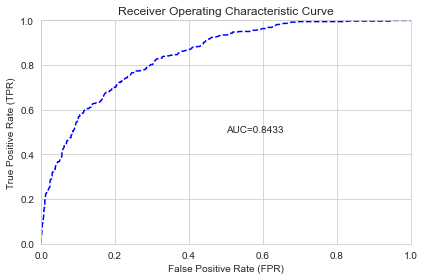

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0009852216748768472,
  0.0019704433497536944,
  0.0019704433497536944,
  0.0019704433497536944,
  0.0019704433497536944,
  0.002955665024630542,
  0.002955665024630542,
  0.002955665024630542,
  0.002955665024630542,
  0.002955665024630542,
  0.003940886699507389,
  0.0049261083743842365,
  0.0049261083743842365,
  0.0049261083743842365,
  0.005911330049261084,
  0.005911330049261084,
  0.006896551724137931,
  0.006896551724137931,
  0.006896551724137931,
  0.006896551724137931,
  0.006896551724137931,
  0.006896551724137931,
  0.007881773399014778,
  0.007881773399014778,
  0.007881773399014778,
  0.008866995073891626,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.009852216748768473,
  0.011822660098522168,
  0.011822660098522168,
  0.012807881773399015,
  0.012807881773399015,
  0.014778325123152709,


In [14]:
aml.leader.model_performance(test_data=test).plot()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20220829_75734_model_4,0.848562,0.41231,0.656186,0.240107,0.365634,0.133688,337,0.002145,XGBoost
GBM_1_AutoML_1_20220829_75734,0.846443,0.414262,0.650538,0.231918,0.366515,0.134334,268,0.003302,GBM
GLM_1_AutoML_1_20220829_75734,0.845363,0.415734,0.648227,0.237545,0.367378,0.134966,247,0.002161,GLM
GBM_5_AutoML_1_20220829_75734,0.842176,0.419244,0.646326,0.236174,0.368754,0.13598,186,0.00333,GBM
GBM_2_AutoML_1_20220829_75734,0.84149,0.420756,0.64062,0.236253,0.369777,0.136735,258,0.003519,GBM
GBM_grid_1_AutoML_1_20220829_75734_model_1,0.840291,0.421895,0.640229,0.236407,0.370292,0.137116,198,0.0032,GBM
GBM_3_AutoML_1_20220829_75734,0.835842,0.42734,0.634662,0.240191,0.372411,0.13869,263,0.002984,GBM
XGBoost_3_AutoML_1_20220829_75734,0.83582,0.430553,0.637456,0.243058,0.373402,0.139429,411,0.002134,XGBoost
XGBoost_1_AutoML_1_20220829_75734,0.833672,0.435541,0.626416,0.248684,0.375388,0.140916,637,0.002359,XGBoost
GBM_4_AutoML_1_20220829_75734,0.831444,0.433932,0.629125,0.239762,0.375671,0.141129,361,0.003393,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20220829_75734_model_4


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.247843936085701: 


,,0,1,Error,Rate
0,0,766.0,249.0,0.2453,(249.0/1015.0)
1,1,90.0,295.0,0.2338,(90.0/385.0)
2,Total,856.0,544.0,0.2421,(339.0/1400.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

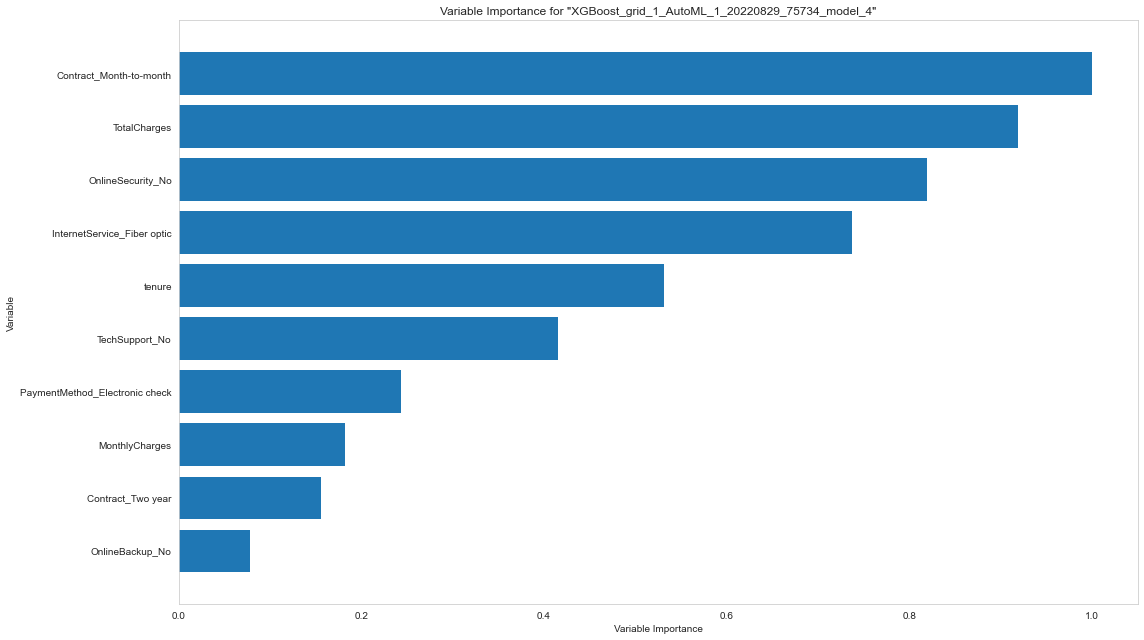

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

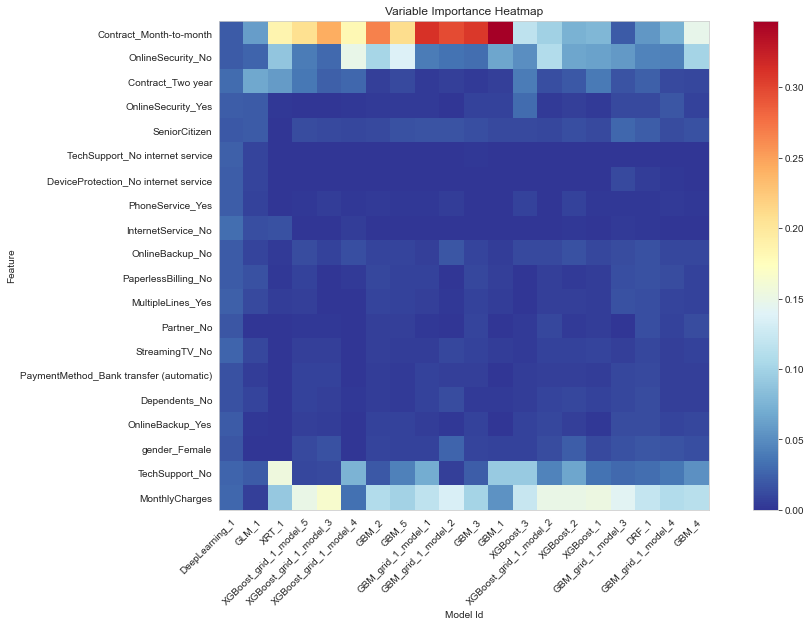

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

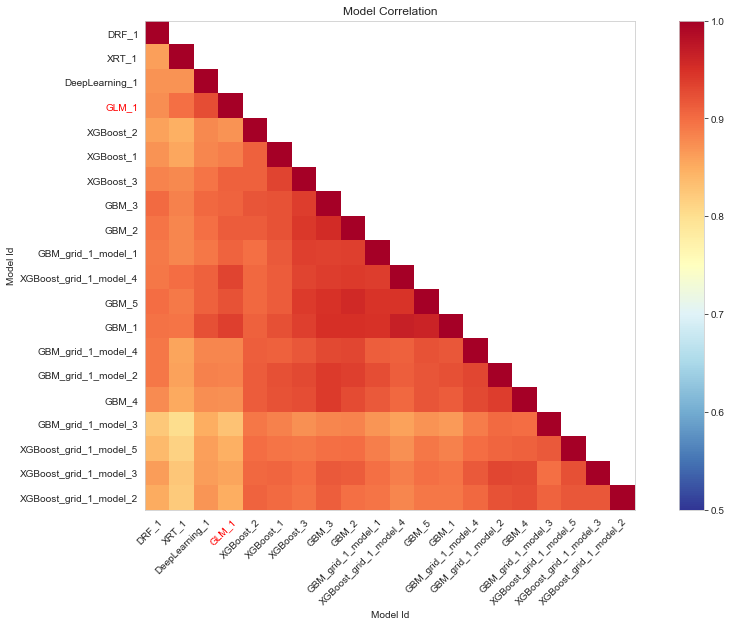

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

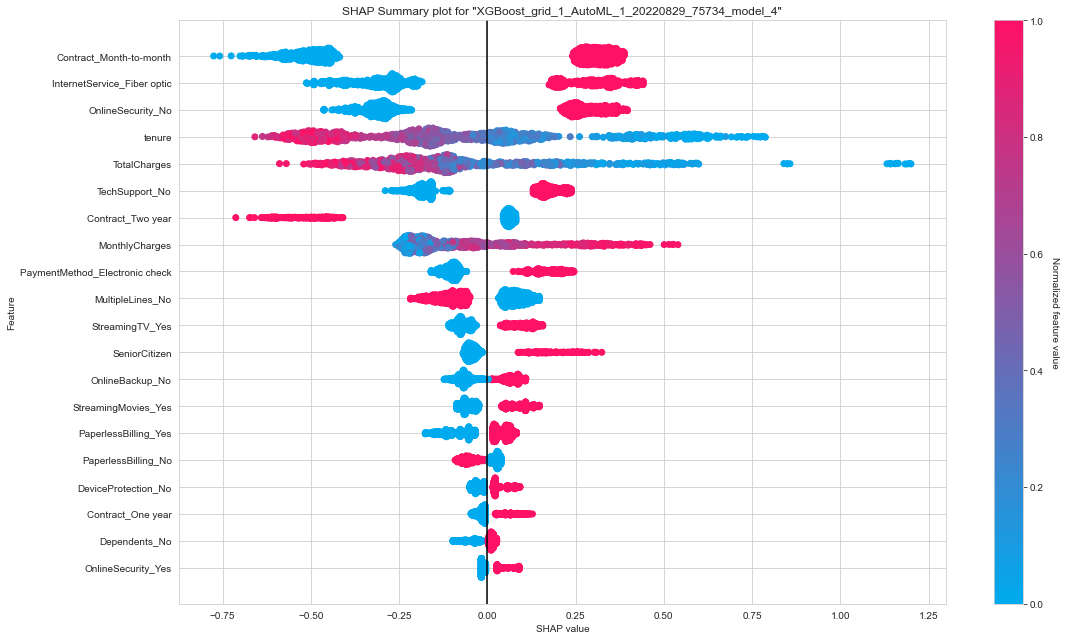

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

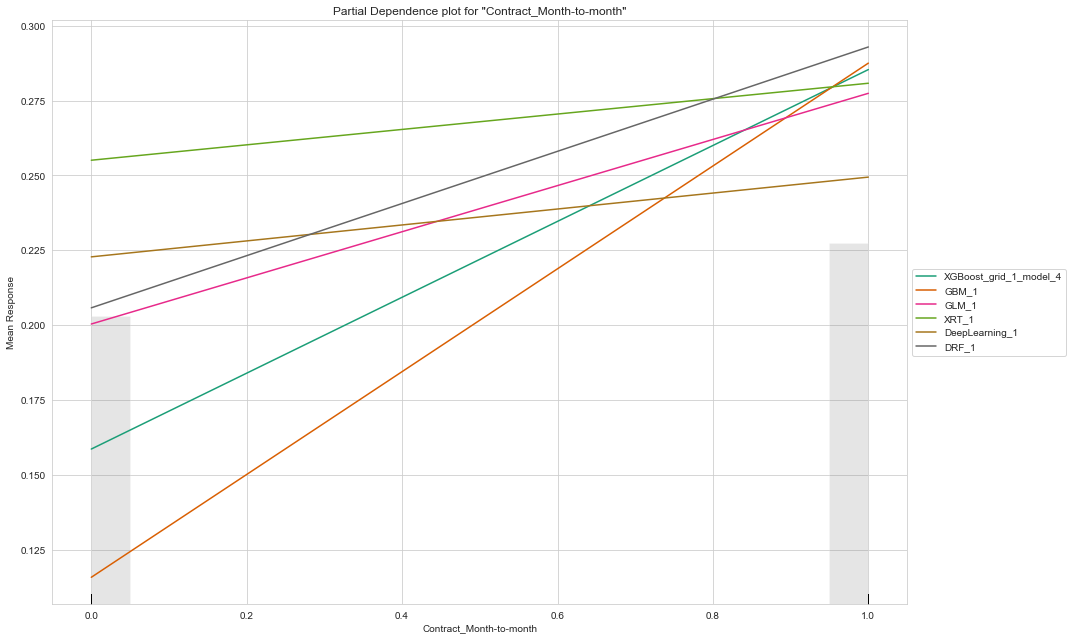

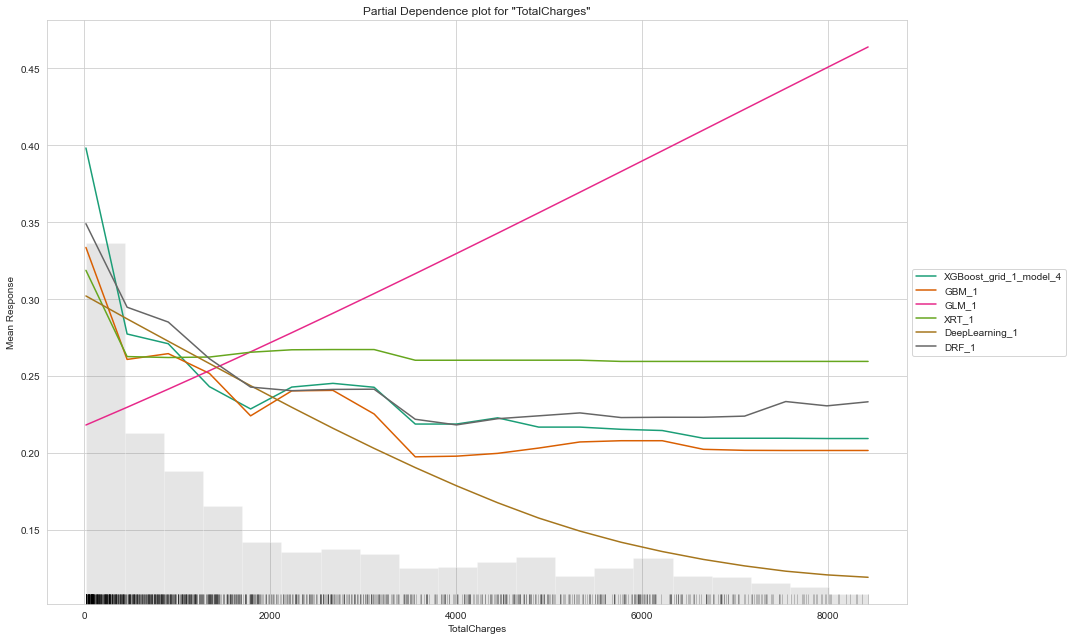

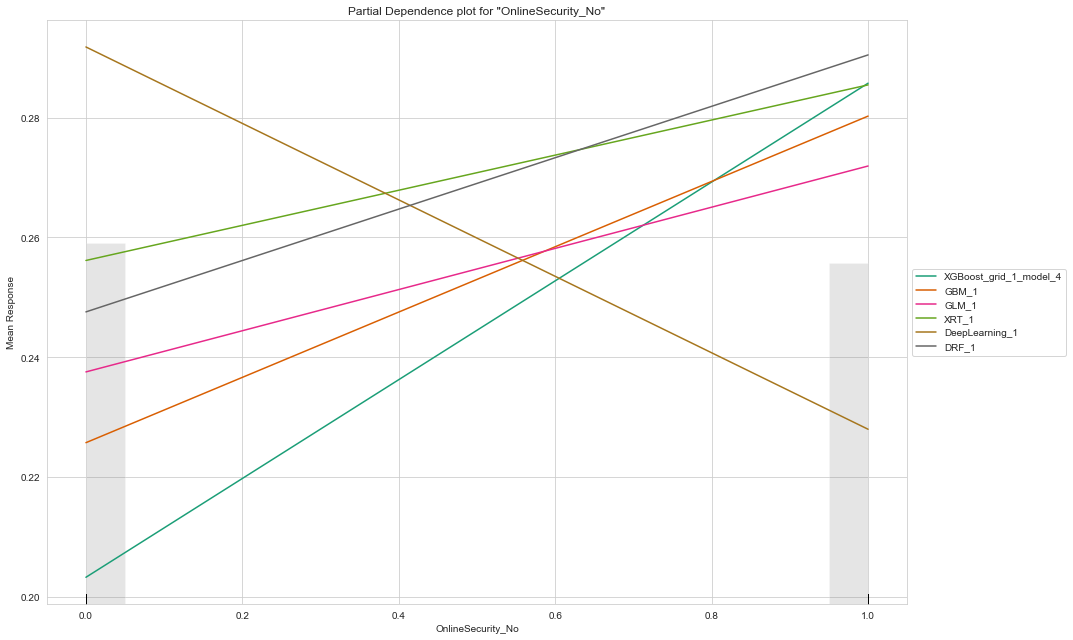

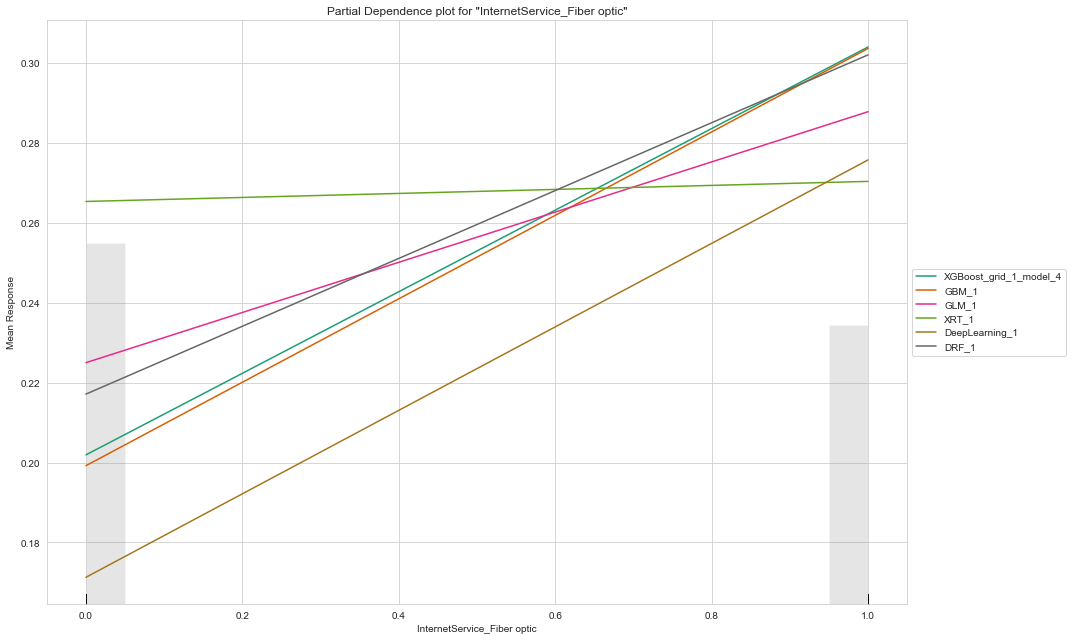

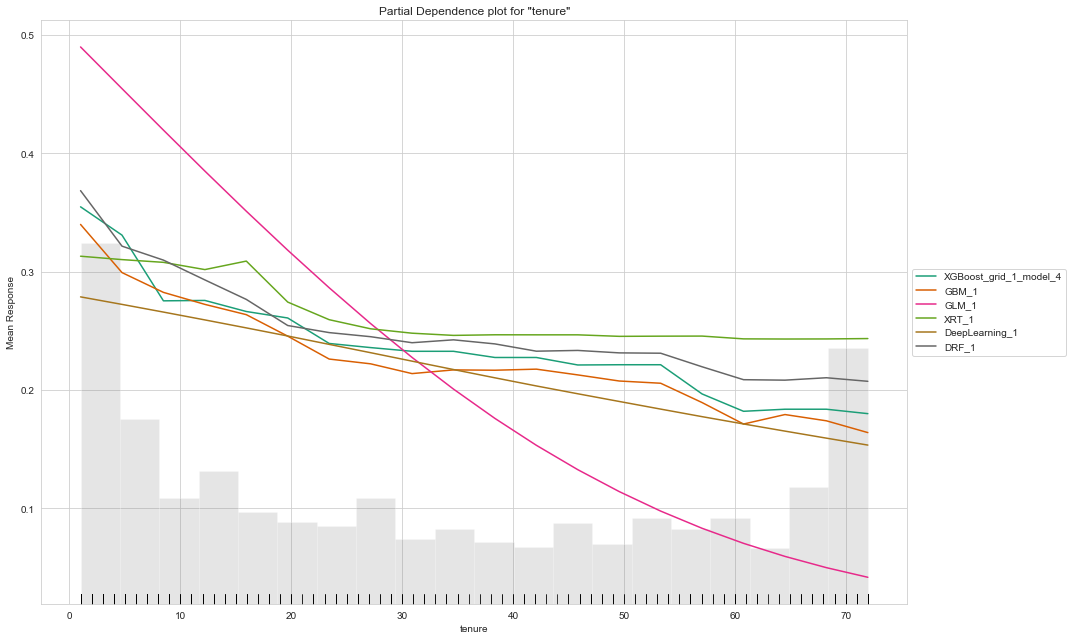

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20220829_75734_model_4,0.848562,0.41231,0.656186,0.240107,0.365634,0.133688,337,0.002145,XGBoost
GBM_1_AutoML_1_20220829_75734,0.846443,0.414262,0.650538,0.231918,0.366515,0.134334,268,0.003302,GBM
GLM_1_AutoML_1_20220829_75734,0.845363,0.415734,0.648227,0.237545,0.367378,0.134966,247,0.002161,GLM
GBM_5_AutoML_1_20220829_75734,0.842176,0.419244,0.646326,0.236174,0.368754,0.13598,186,0.00333,GBM
GBM_2_AutoML_1_20220829_75734,0.84149,0.420756,0.64062,0.236253,0.369777,0.136735,258,0.003519,GBM
GBM_grid_1_AutoML_1_20220829_75734_model_1,0.840291,0.421895,0.640229,0.236407,0.370292,0.137116,198,0.0032,GBM
GBM_3_AutoML_1_20220829_75734,0.835842,0.42734,0.634662,0.240191,0.372411,0.13869,263,0.002984,GBM
XGBoost_3_AutoML_1_20220829_75734,0.83582,0.430553,0.637456,0.243058,0.373402,0.139429,411,0.002134,XGBoost
XGBoost_1_AutoML_1_20220829_75734,0.833672,0.435541,0.626416,0.248684,0.375388,0.140916,637,0.002359,XGBoost
GBM_4_AutoML_1_20220829_75734,0.831444,0.433932,0.629125,0.239762,0.375671,0.141129,361,0.003393,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20220829_75734_model_4


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.247843936085701: 


,,0,1,Error,Rate
0,0,766.0,249.0,0.2453,(249.0/1015.0)
1,1,90.0,295.0,0.2338,(90.0/385.0)
2,Total,856.0,544.0,0.2421,(339.0/1400.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [15]:
aml.explain(test)

## Segundo ejemplo: Predicción de cargos de aseguradora

In [16]:
dataset = h2o.import_file("data/insurance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
dataset.describe()

Rows:1338
Cols:7




,age,sex,bmi,children,smoker,region,expenses
type,int,enum,real,int,enum,enum,real
mins,18.0,,16.0,0.0,,,1121.87
mean,39.20702541106125,,30.665470852017954,1.0949177877429015,,,13270.422414050818
maxs,64.0,,53.1,5.0,,,63770.43
sigma,14.049960379216147,,6.09838219000336,1.205492739781914,,,12110.011239706475
zeros,0,,0,574,,,0
missing,0,0,0,0,0,0,0
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46


In [19]:
train, test = dataset.split_frame([0.8], seed=42)

In [20]:
# Identify predictors and response
x = train.columns
y = "expenses"

In [21]:
aml = H2OAutoML(max_runtime_secs = 90, #change this if you are in a rush hehehe
                max_models = 25,
                seed = 42,
                project_name='regression1',
                sort_metric = "MAE")

In [22]:
%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 954 ms, sys: 176 ms, total: 1.13 s
Wall time: 1min 31s
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_2_20220829_80441_model_4


Model Summary: 


,,number_of_trees
0,,54.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 17064641.4862995
RMSE: 4130.937119625461
MAE: 2295.0658614483664
RMSLE: 0.3506432305685743
Mean Residual Deviance: 17064641.4862995

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 20898893.31472703
RMSE: 4571.530740870833
MAE: 2573.6458703659
RMSLE: 0.4106834993733793
Mean Residual Deviance: 20898893.31472703

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.573854e+03,2.453201e+02,2.773095e+03,2.570535e+03,2.155124e+03,2.706029e+03,2.664490e+03
1,mean_residual_deviance,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
2,mse,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
3,r2,8.600103e-01,3.256278e-02,8.245401e-01,8.630909e-01,9.091052e-01,8.370997e-01,8.662157e-01
4,residual_deviance,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
5,rmse,4.551828e+03,4.800024e+02,4.718560e+03,4.659253e+03,3.723364e+03,4.974394e+03,4.683567e+03
6,rmsle,4.096115e-01,3.367581e-02,4.385878e-01,3.950150e-01,3.576381e-01,4.345599e-01,4.222566e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-29 08:04:46,1.112 sec,0.0,18247.502195,13495.390487,3.329713e+08
1,,2022-08-29 08:04:46,1.117 sec,5.0,8642.506226,4839.657476,7.469291e+07
2,,2022-08-29 08:04:46,1.121 sec,10.0,5733.623859,3288.339214,3.287444e+07
3,,2022-08-29 08:04:46,1.125 sec,15.0,4885.194316,2870.083354,2.386512e+07
4,,2022-08-29 08:04:46,1.129 sec,20.0,4594.366170,2684.029249,2.110820e+07
5,,2022-08-29 08:04:46,1.133 sec,25.0,4463.580771,2643.797696,1.992355e+07
6,,2022-08-29 08:04:46,1.137 sec,30.0,4367.839200,2512.501556,1.907802e+07
7,,2022-08-29 08:04:46,1.141 sec,35.0,4276.427556,2425.737773,1.828783e+07
8,,2022-08-29 08:04:46,1.146 sec,40.0,4223.971176,2412.888950,1.784193e+07
9,,2022-08-29 08:04:46,1.151 sec,45.0,4182.981126,2371.590694,1.749733e+07



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,smoker.no,6.879301e+10,1.000000,0.545124
1,smoker.yes,2.201863e+10,0.320071,0.174478
2,bmi,1.930368e+10,0.280605,0.152965
3,age,1.350595e+10,0.196327,0.107023
4,children,1.351666e+09,0.019648,0.010711
5,region.southwest,3.892670e+08,0.005659,0.003085
6,region.southeast,2.742331e+08,0.003986,0.002173
7,sex.female,2.730238e+08,0.003969,0.002163
8,region.northeast,1.941222e+08,0.002822,0.001538
9,sex.male,7.490626e+07,0.001089,0.000594


In [23]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_2_20220829_80441_model_4


Model Summary: 


,,number_of_trees
0,,54.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 17064641.4862995
RMSE: 4130.937119625461
MAE: 2295.0658614483664
RMSLE: 0.3506432305685743
Mean Residual Deviance: 17064641.4862995

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 20898893.31472703
RMSE: 4571.530740870833
MAE: 2573.6458703659
RMSLE: 0.4106834993733793
Mean Residual Deviance: 20898893.31472703

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.573854e+03,2.453201e+02,2.773095e+03,2.570535e+03,2.155124e+03,2.706029e+03,2.664490e+03
1,mean_residual_deviance,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
2,mse,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
3,r2,8.600103e-01,3.256278e-02,8.245401e-01,8.630909e-01,9.091052e-01,8.370997e-01,8.662157e-01
4,residual_deviance,2.090346e+07,4.119572e+06,2.226480e+07,2.170864e+07,1.386344e+07,2.474459e+07,2.193580e+07
5,rmse,4.551828e+03,4.800024e+02,4.718560e+03,4.659253e+03,3.723364e+03,4.974394e+03,4.683567e+03
6,rmsle,4.096115e-01,3.367581e-02,4.385878e-01,3.950150e-01,3.576381e-01,4.345599e-01,4.222566e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-29 08:04:46,1.112 sec,0.0,18247.502195,13495.390487,3.329713e+08
1,,2022-08-29 08:04:46,1.117 sec,5.0,8642.506226,4839.657476,7.469291e+07
2,,2022-08-29 08:04:46,1.121 sec,10.0,5733.623859,3288.339214,3.287444e+07
3,,2022-08-29 08:04:46,1.125 sec,15.0,4885.194316,2870.083354,2.386512e+07
4,,2022-08-29 08:04:46,1.129 sec,20.0,4594.366170,2684.029249,2.110820e+07
5,,2022-08-29 08:04:46,1.133 sec,25.0,4463.580771,2643.797696,1.992355e+07
6,,2022-08-29 08:04:46,1.137 sec,30.0,4367.839200,2512.501556,1.907802e+07
7,,2022-08-29 08:04:46,1.141 sec,35.0,4276.427556,2425.737773,1.828783e+07
8,,2022-08-29 08:04:46,1.146 sec,40.0,4223.971176,2412.888950,1.784193e+07
9,,2022-08-29 08:04:46,1.151 sec,45.0,4182.981126,2371.590694,1.749733e+07



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,smoker.no,6.879301e+10,1.000000,0.545124
1,smoker.yes,2.201863e+10,0.320071,0.174478
2,bmi,1.930368e+10,0.280605,0.152965
3,age,1.350595e+10,0.196327,0.107023
4,children,1.351666e+09,0.019648,0.010711
5,region.southwest,3.892670e+08,0.005659,0.003085
6,region.southeast,2.742331e+08,0.003986,0.002173
7,sex.female,2.730238e+08,0.003969,0.002163
8,region.northeast,1.941222e+08,0.002822,0.001538
9,sex.male,7.490626e+07,0.001089,0.000594


In [24]:
aml.leader.model_performance(test_data=test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 21478565.891148638
RMSE: 4634.497372007954
MAE: 2516.50347177011
RMSLE: 0.4138696203130225
Mean Residual Deviance: 21478565.891148638


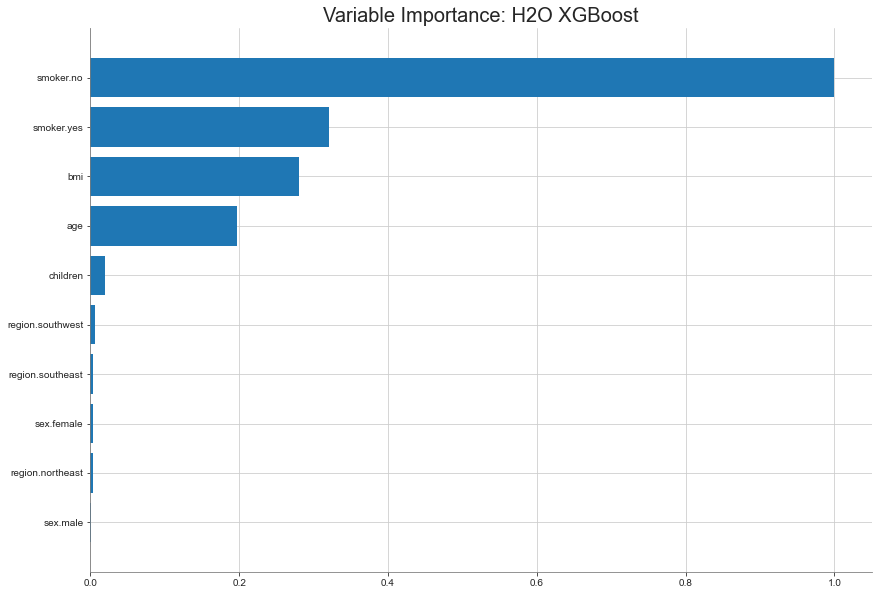

<Figure size 432x288 with 0 Axes>

In [26]:
aml.leader.varimp_plot()

In [28]:
aml.leader.r2(test)

0.886873584421811

In [31]:
aml.leader.mae(test)

2295.0658614483664

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20220829_80441_model_4,2573.65,4571.53,2.08989e+07,0.410683,2.08989e+07,51,0.001745,XGBoost
GBM_grid_1_AutoML_2_20220829_80441_model_2,2646.89,4650.68,2.16289e+07,0.444236,2.16289e+07,50,0.008004,GBM
GBM_grid_1_AutoML_2_20220829_80441_model_1,2739.2,4763.77,2.26935e+07,0.450321,2.26935e+07,44,0.006821,GBM
GBM_3_AutoML_2_20220829_80441,2833.65,4729.92,2.23722e+07,0.467713,2.23722e+07,76,0.01131,GBM
XGBoost_3_AutoML_2_20220829_80441,2872.19,4891.21,2.39239e+07,nan,2.39239e+07,48,0.001882,XGBoost
DeepLearning_1_AutoML_2_20220829_80441,2876.31,5020.38,2.52042e+07,0.476108,2.52042e+07,56,0.001812,DeepLearning
DRF_1_AutoML_2_20220829_80441,2900.06,4860.94,2.36288e+07,0.445578,2.36288e+07,146,0.015486,DRF
GBM_2_AutoML_2_20220829_80441,2948.89,4827.38,2.33036e+07,0.492652,2.33036e+07,89,0.013331,GBM
GBM_4_AutoML_2_20220829_80441,2970.7,4818.12,2.32142e+07,0.476134,2.32142e+07,81,0.013345,GBM
DeepLearning_grid_1_AutoML_2_20220829_80441_model_1,3007.72,4899.33,2.40035e+07,nan,2.40035e+07,14502,0.001287,DeepLearning


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

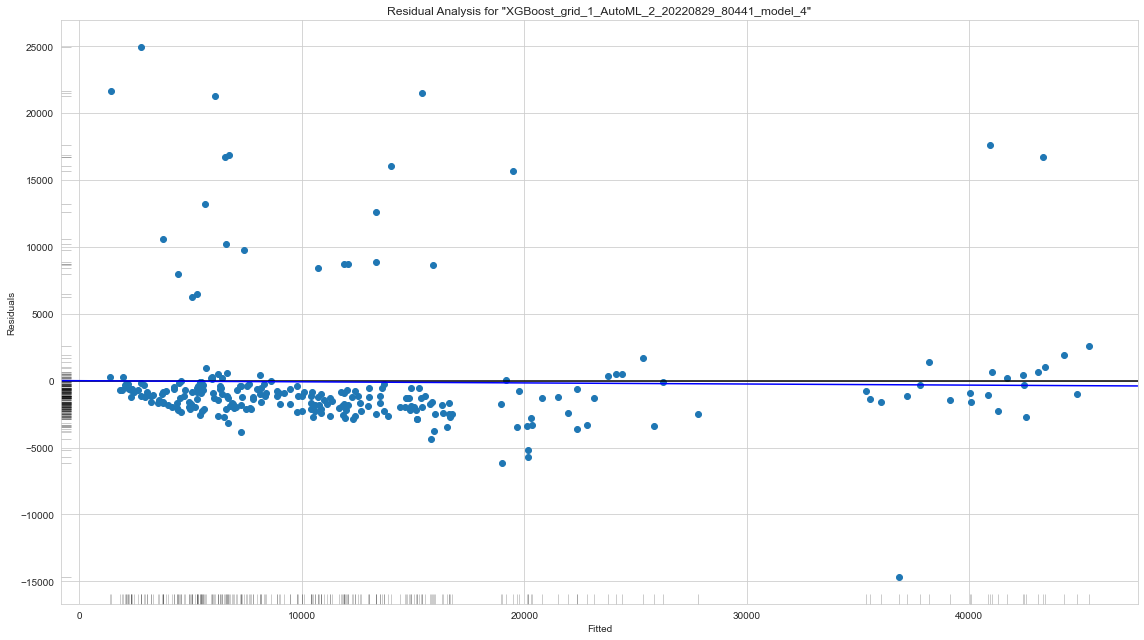

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

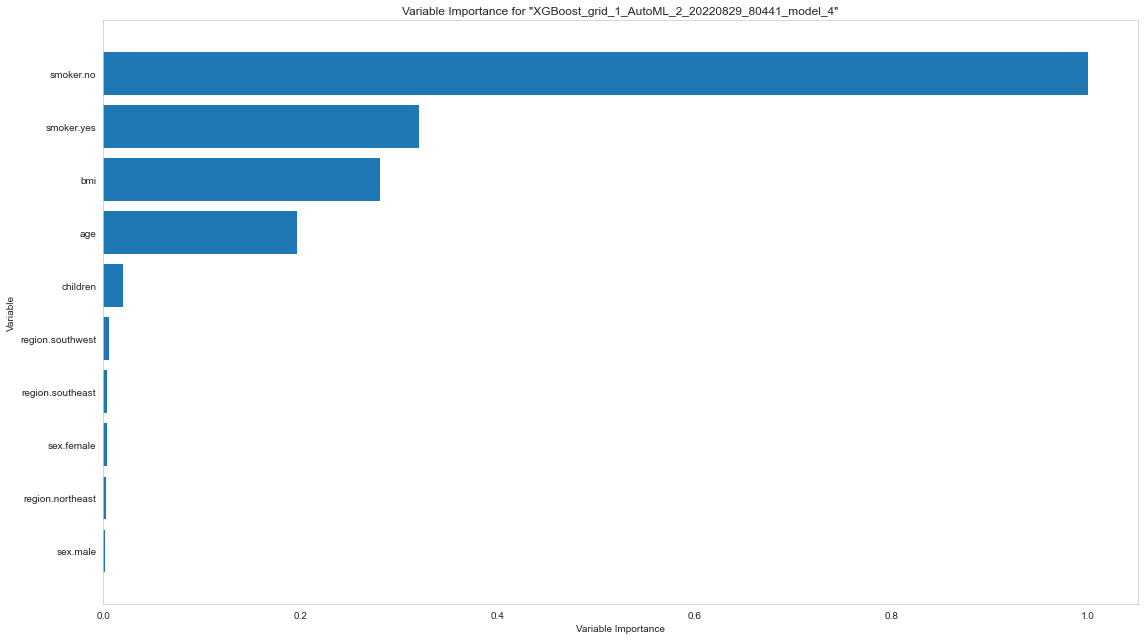

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

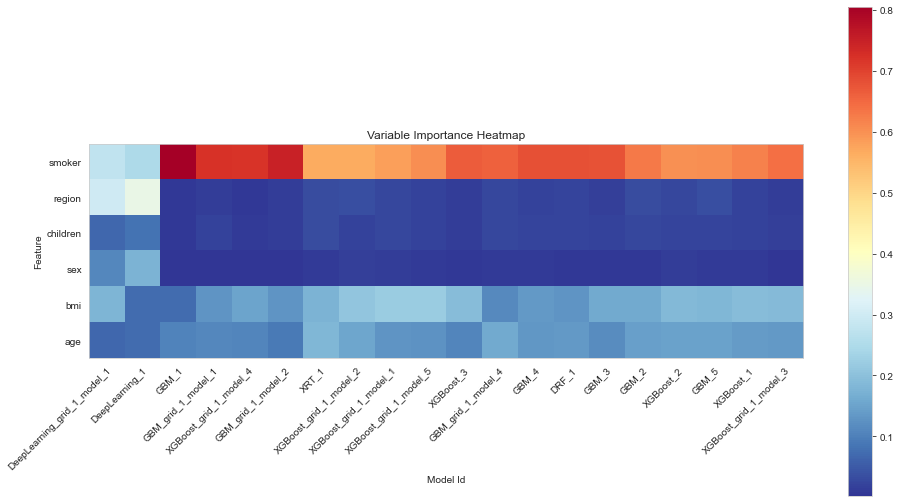

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

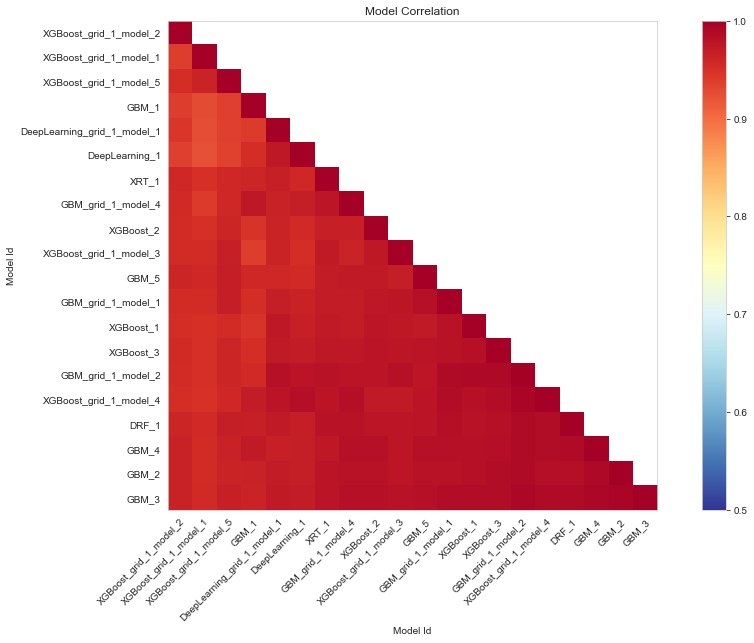

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

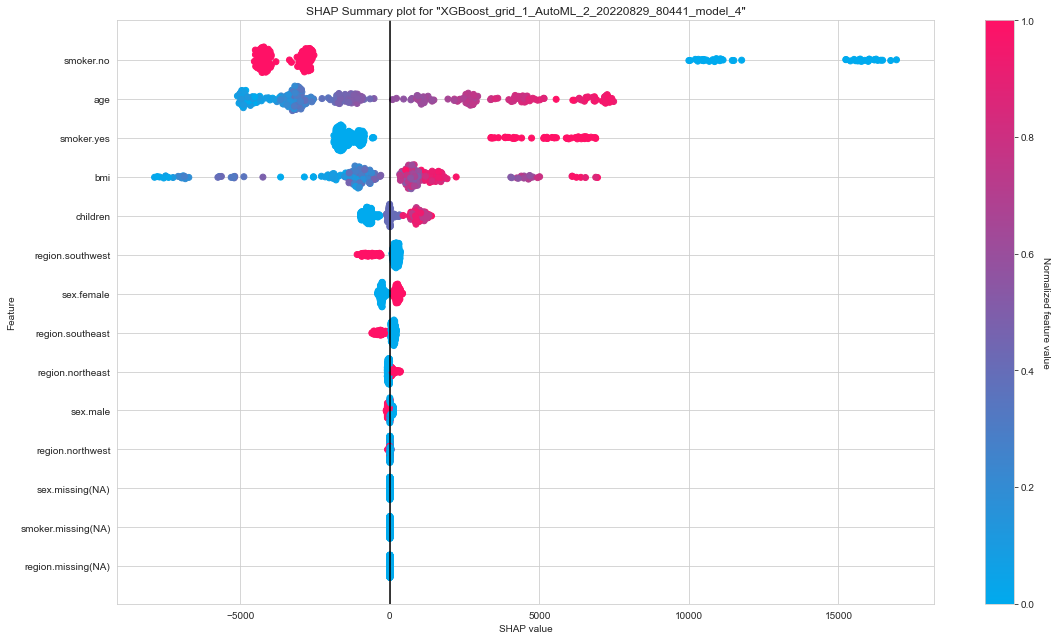

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

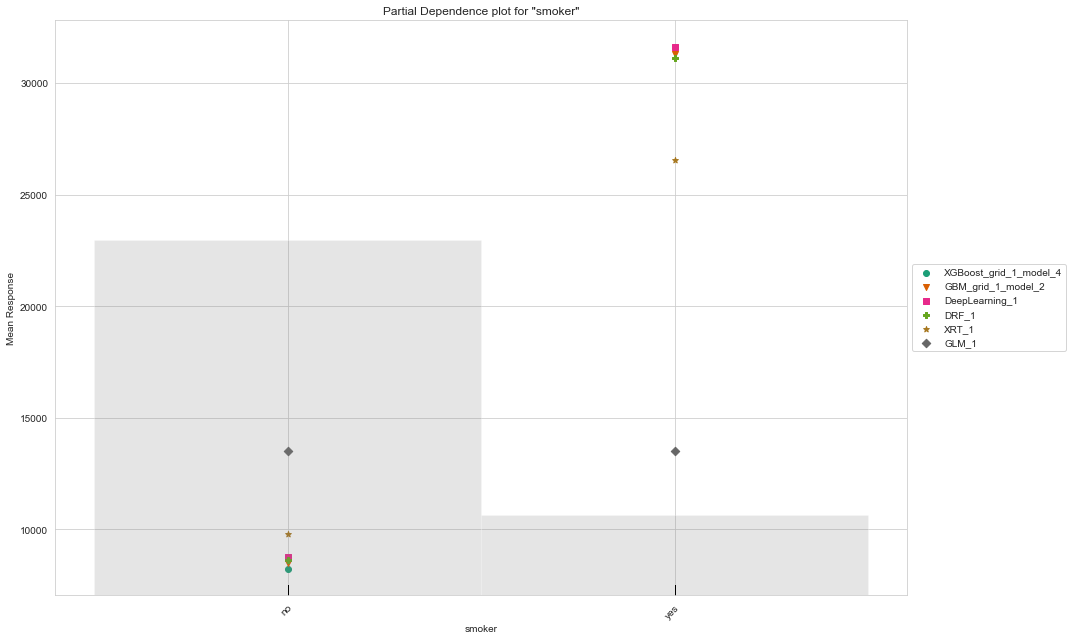

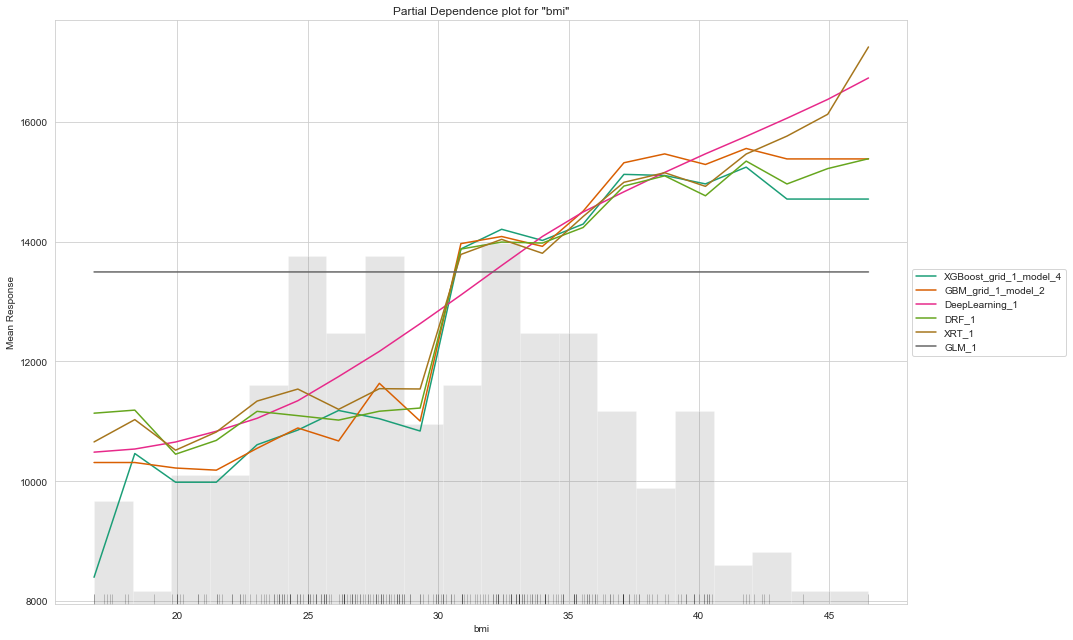

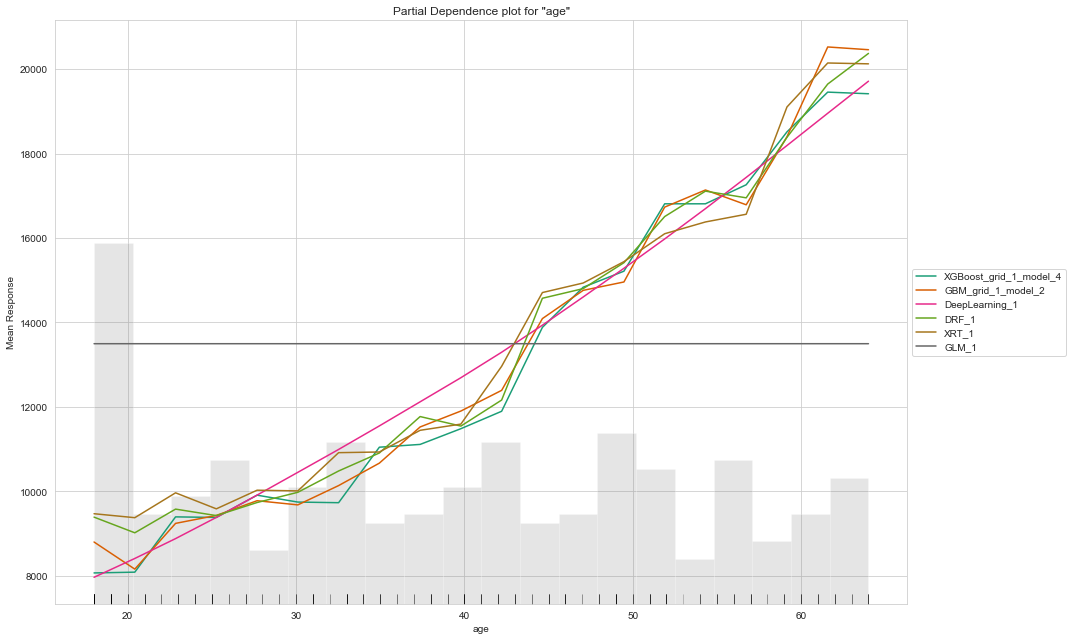

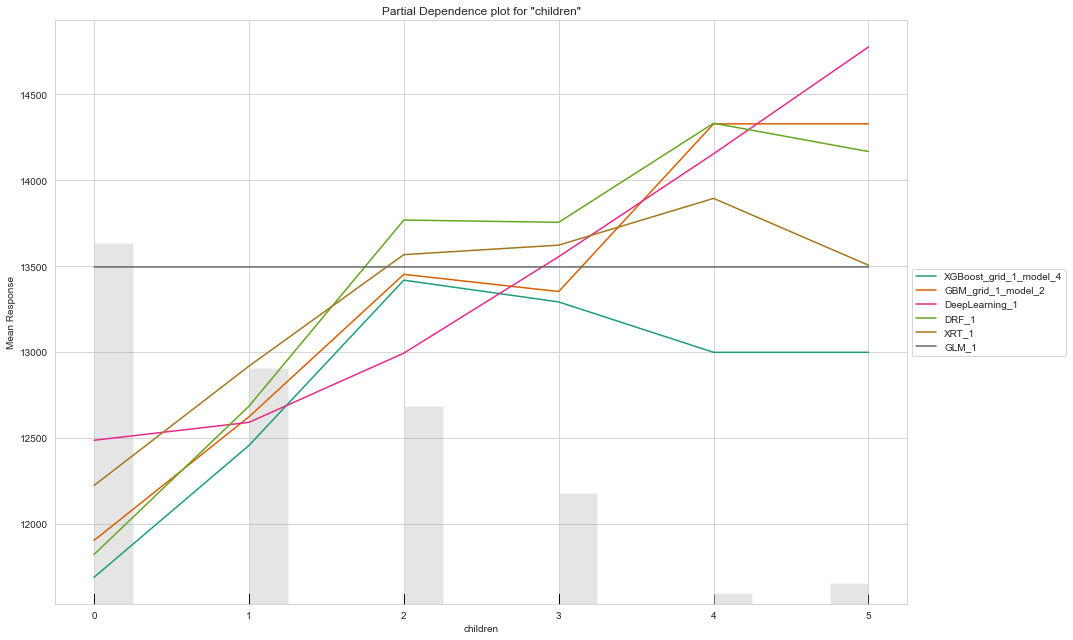

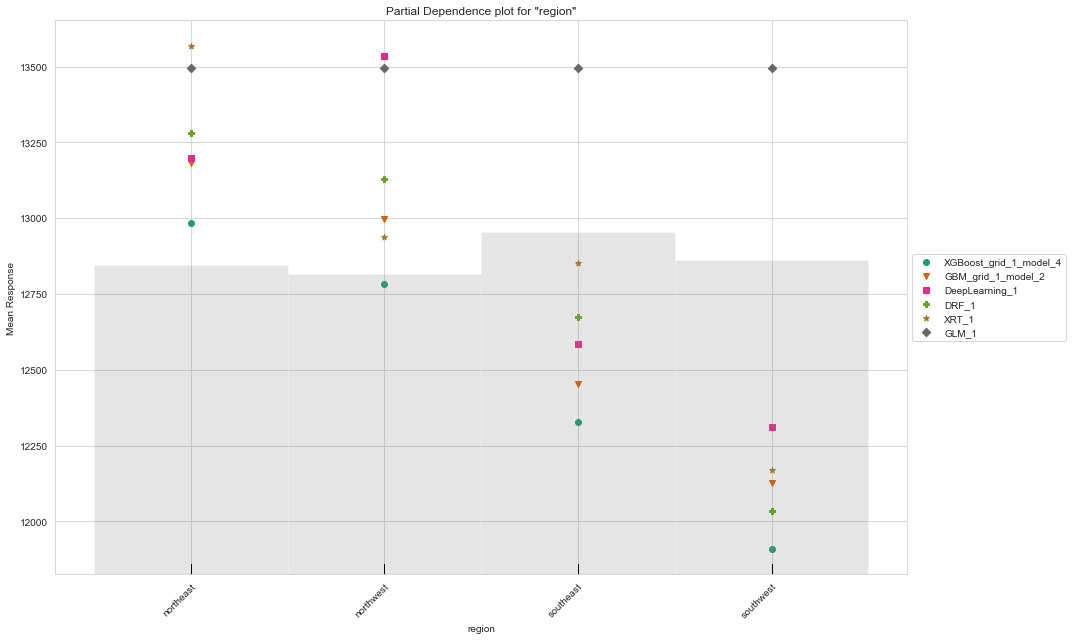

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

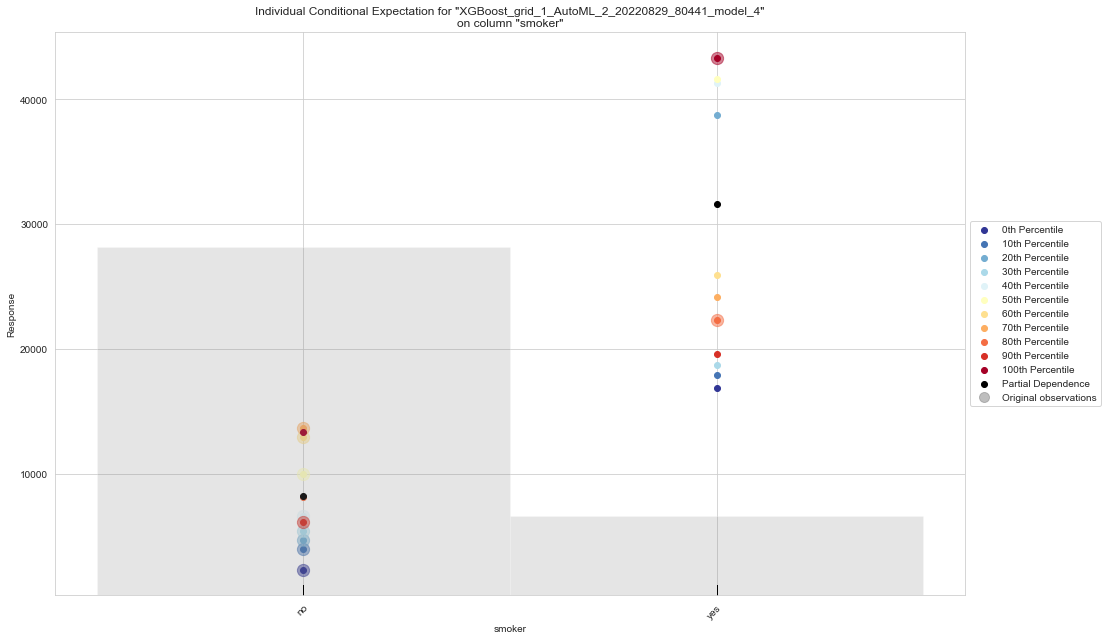

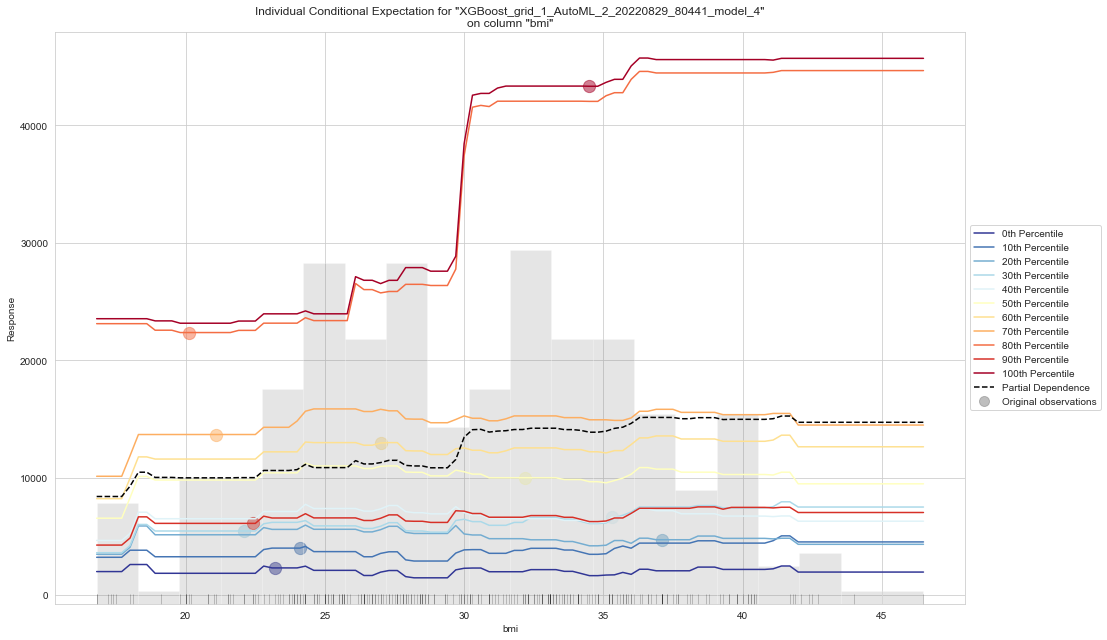

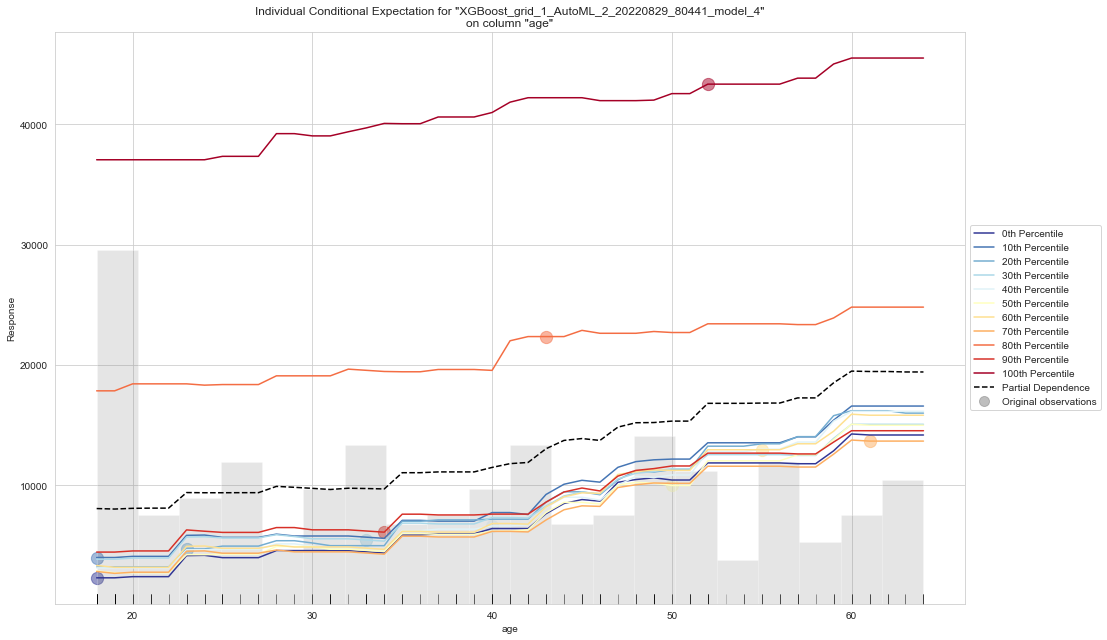

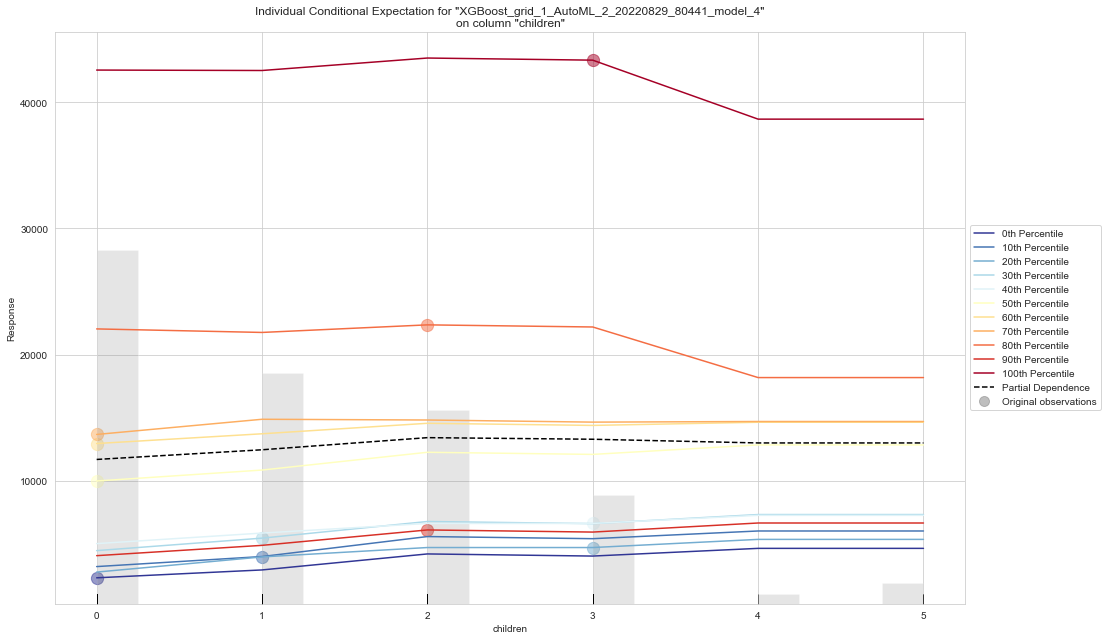

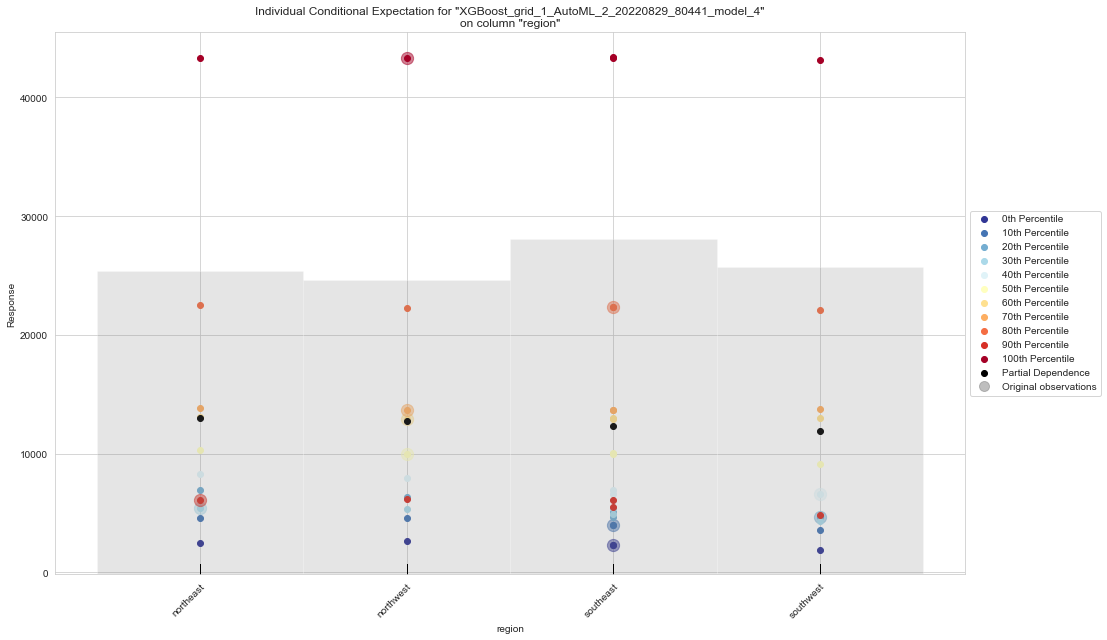

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20220829_80441_model_4,2573.65,4571.53,2.08989e+07,0.410683,2.08989e+07,51,0.001745,XGBoost
GBM_grid_1_AutoML_2_20220829_80441_model_2,2646.89,4650.68,2.16289e+07,0.444236,2.16289e+07,50,0.008004,GBM
GBM_grid_1_AutoML_2_20220829_80441_model_1,2739.2,4763.77,2.26935e+07,0.450321,2.26935e+07,44,0.006821,GBM
GBM_3_AutoML_2_20220829_80441,2833.65,4729.92,2.23722e+07,0.467713,2.23722e+07,76,0.01131,GBM
XGBoost_3_AutoML_2_20220829_80441,2872.19,4891.21,2.39239e+07,nan,2.39239e+07,48,0.001882,XGBoost
DeepLearning_1_AutoML_2_20220829_80441,2876.31,5020.38,2.52042e+07,0.476108,2.52042e+07,56,0.001812,DeepLearning
DRF_1_AutoML_2_20220829_80441,2900.06,4860.94,2.36288e+07,0.445578,2.36288e+07,146,0.015486,DRF
GBM_2_AutoML_2_20220829_80441,2948.89,4827.38,2.33036e+07,0.492652,2.33036e+07,89,0.013331,GBM
GBM_4_AutoML_2_20220829_80441,2970.7,4818.12,2.32142e+07,0.476134,2.32142e+07,81,0.013345,GBM
DeepLearning_grid_1_AutoML_2_20220829_80441_model_1,3007.72,4899.33,2.40035e+07,nan,2.40035e+07,14502,0.001287,DeepLearning


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [30]:
aml.explain(test)